In [20]:
import pandas as pd
from pymining import seqmining

df = pd.read_csv(
    'C:/Users/User/Desktop/data mining/datawarehouse/data-mining-warehousing-wages-analysis/data/prep_survey_profile.csv',
    encoding='utf-8'
)

df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


C:\Users\User\AppData\Local\Temp\ipykernel_10472\3560949457.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [21]:

# Convert your data to sequences (assuming 'df' is a DataFrame)
sequences = df.values.tolist()

# Total number of sequences
total_sequences = len(sequences)

# Minimum support threshold (raw count)
min_support = 10

# Find the frequent sequential patterns
patterns = seqmining.freq_seq_enum(sequences, min_support)

# Filter patterns to include only those with length 2 or more
filtered_patterns = [pattern for pattern in patterns if len(pattern[0]) >= 3]

# Sort patterns based on support in descending order and take the top 20
sorted_patterns = sorted(filtered_patterns, key=lambda x: x[1], reverse=True)[:20]

# Calculate and print the patterns with their support, confidence, and lift
print("Frequent Sequential Patterns with Confidence and Lift:")
for pattern, support in sorted_patterns:
    # Normalize support to the range [0, 1]
    normalized_support = support / total_sequences
    
    # Example: if your pattern is [A, B], you can calculate confidence and lift for A -> B
    antecedent = pattern[:-1]  # The part before the last item (e.g., [A])
    consequent = pattern[-1]   # The last item of the pattern (e.g., [B])

    # Compute the support of the antecedent (e.g., [A])
    antecedent_support = sum(1 for seq in sequences if set(antecedent).issubset(seq)) / total_sequences

    # Compute the support of the consequent (e.g., [B])
    consequent_support = sum(1 for seq in sequences if consequent in seq) / total_sequences

    # Calculate confidence for the rule A -> B
    confidence = normalized_support / antecedent_support if antecedent_support > 0 else 0

    # Calculate lift for the rule A -> B
    lift = (normalized_support / (antecedent_support * consequent_support)) if (antecedent_support * consequent_support) > 0 else 0

    # Print the pattern, normalized support, confidence, and lift
    print(f"Pattern: {pattern}, Support: {normalized_support:.4f}, Confidence: {confidence:.4f}, Lift: {lift:.4f}")


Frequent Sequential Patterns with Confidence and Lift:
Pattern: ('Male', 'Python', 'Never'), Support: 0.5385, Confidence: 0.7692, Lift: 0.9880
Pattern: ('Male', 'Local development environments', 'Python'), Support: 0.4289, Confidence: 0.8099, Lift: 1.0111
Pattern: ('Male', 'Local development environments', 'Never'), Support: 0.4177, Confidence: 0.7889, Lift: 1.0132
Pattern: ('Local development environments', 'Python', 'Never'), Support: 0.3840, Confidence: 0.7882, Lift: 1.0123
Pattern: ('Male', 'Local development environments', 'Python', 'Never'), Support: 0.3358, Confidence: 0.7830, Lift: 1.0056
Pattern: ('Male', 'Master’s degree', 'Python'), Support: 0.3312, Confidence: 0.8009, Lift: 0.9999
Pattern: ('Male', 'Master’s degree', 'Never'), Support: 0.3248, Confidence: 0.7854, Lift: 1.0088
Pattern: ('Master’s degree', 'Python', 'Never'), Support: 0.2994, Confidence: 0.7825, Lift: 1.0051
Pattern: ('Male', 'Master’s degree', 'Python', 'Never'), Support: 0.2579, Confidence: 0.7786, Lift: 1.

In [22]:
from tabulate import tabulate

# Create an empty list to store the results
results = []

# Calculate and store the patterns with their support, confidence, and lift
for pattern, support in sorted_patterns:
    # Normalize support to the range [0, 1]
    normalized_support = support / total_sequences
    
    # Example: if your pattern is [A, B], you can calculate confidence and lift for A -> B
    antecedent = pattern[:-1]  # The part before the last item (e.g., [A])
    consequent = pattern[-1]   # The last item of the pattern (e.g., [B])

    # Compute the support of the antecedent (e.g., [A])
    antecedent_support = sum(1 for seq in sequences if set(antecedent).issubset(seq)) / total_sequences

    # Compute the support of the consequent (e.g., [B])
    consequent_support = sum(1 for seq in sequences if consequent in seq) / total_sequences

    # Calculate confidence for the rule A -> B
    confidence = normalized_support / antecedent_support if antecedent_support > 0 else 0

    # Calculate lift for the rule A -> B
    lift = (normalized_support / (antecedent_support * consequent_support)) if (antecedent_support * consequent_support) > 0 else 0

    # Append the results to the list
    results.append({
        'Pattern': pattern,
        'Support': normalized_support,
        'Confidence': confidence,
        'Lift': lift
    })

# Create a table using tabulate
table = tabulate(results, headers='keys', tablefmt='pretty')

# Print the table
print("Frequent Sequential Patterns with Confidence and Lift:")
print(table)


Frequent Sequential Patterns with Confidence and Lift:
+-------------------------------------------------------------------------+---------------------+---------------------+--------------------+
|                                 Pattern                                 |       Support       |     Confidence      |        Lift        |
+-------------------------------------------------------------------------+---------------------+---------------------+--------------------+
|                       ('Male', 'Python', 'Never')                       | 0.5385305808436979  | 0.7692307692307692  | 0.9880156075808249 |
|          ('Male', 'Local development environments', 'Python')           | 0.4289011411719451  | 0.8099273607748183  | 1.0111451075208593 |
|           ('Male', 'Local development environments', 'Never')           | 0.4177458648544685  | 0.7888619854721549  | 1.0132303400357932 |
|          ('Local development environments', 'Python', 'Never')          | 0.3840235927683036  | 0

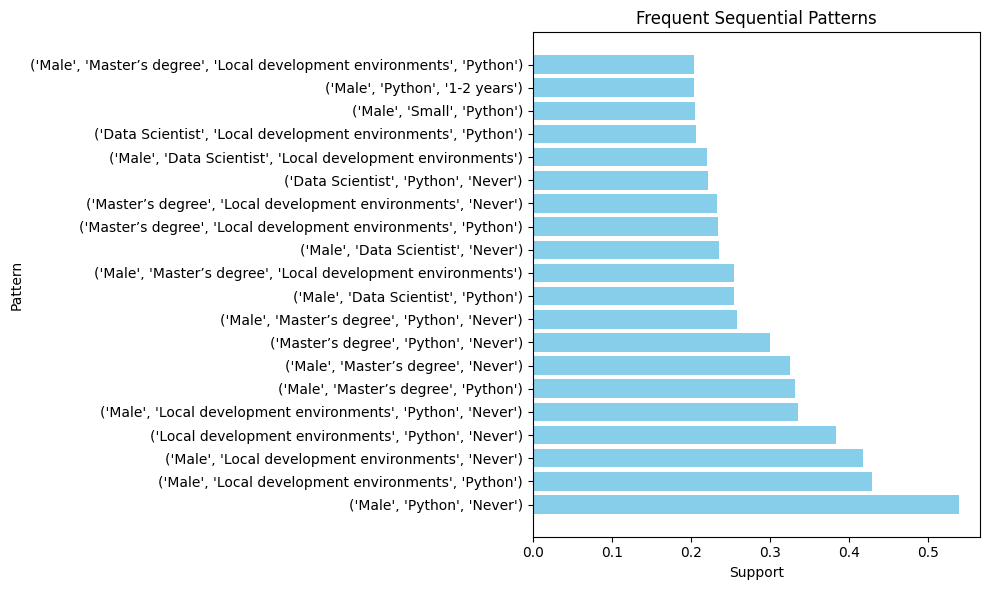

In [23]:
import matplotlib.pyplot as plt

patterns = [str(pattern) for pattern, _ in sorted_patterns]  # Convert patterns to string for easy labeling
supports = [support / total_sequences for _, support in sorted_patterns]  # Normalize support

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(patterns[:20], supports[:20], color='skyblue')

# Add labels and title
plt.xlabel('Support')
plt.ylabel('Pattern')
plt.title('Frequent Sequential Patterns')

# Show the plot
plt.tight_layout()
plt.show()